# Classification task on Tensorflow and how to deal with overfitting

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
sns.set_style('darkgrid')

In [7]:
# Classification of tumors(benign,malignant)
df = pd.read_csv('../DATA/cancer_classification.csv')

In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
df.info()
# To check for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


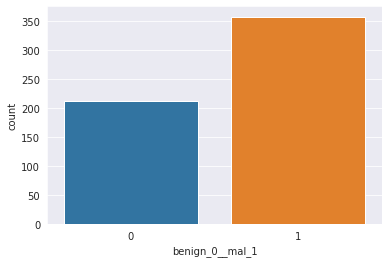

In [12]:
sns.countplot(x='benign_0__mal_1',data=df)

In [13]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [15]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

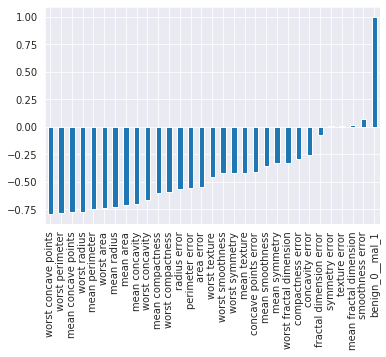

In [16]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

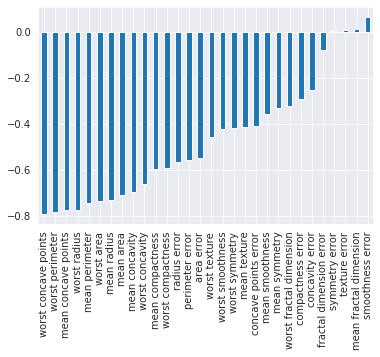

In [17]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

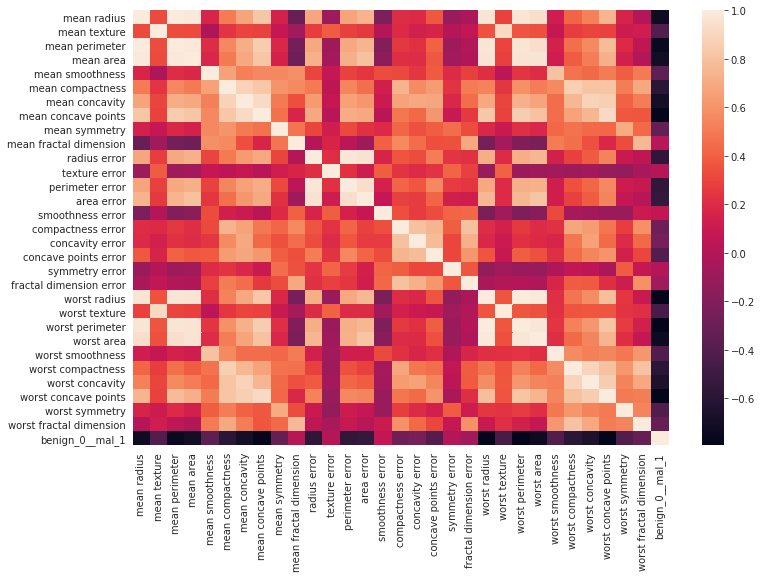

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

In [21]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()

In [26]:
X_train = scaler.fit_transform(X_train)

In [27]:
X_test = scaler.transform(X_test)

### Create a model and prevent over fitting

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [31]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
# Binary classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [32]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 6ms/sample - loss: 0.6754 - val_loss: 0.6539
Epoch 2/600
426/426 [==============================] - 0s 338us/sample - loss: 0.6344 - val_loss: 0.6085
Epoch 3/600
426/426 [==============================] - 0s 336us/sample - loss: 0.5851 - val_loss: 0.5612
Epoch 4/600
426/426 [==============================] - 0s 353us/sample - loss: 0.5401 - val_loss: 0.5156
Epoch 5/600
426/426 [==============================] - 0s 357us/sample - loss: 0.4953 - val_loss: 0.4694
Epoch 6/600
426/426 [==============================] - 0s 412us/sample - loss: 0.4495 - val_loss: 0.4215
Epoch 7/600
426/426 [==============================] - 0s 453us/sample - loss: 0.4036 - val_loss: 0.3763
Epoch 8/600
426/426 [==============================] - 0s 472us/sample - loss: 0.3621 - val_loss: 0.3360
Epoch 9/600
426/426 [==============================] - 0s 432us/sample - loss: 0.3267 - val_loss: 0.3005
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 602us/sample - loss: 0.0591 - val_loss: 0.1158
Epoch 79/600
426/426 [==============================] - 0s 521us/sample - loss: 0.0554 - val_loss: 0.1144
Epoch 80/600
426/426 [==============================] - 0s 560us/sample - loss: 0.0555 - val_loss: 0.1124
Epoch 81/600
426/426 [==============================] - 0s 530us/sample - loss: 0.0556 - val_loss: 0.1175
Epoch 82/600
426/426 [==============================] - 0s 492us/sample - loss: 0.0540 - val_loss: 0.1075
Epoch 83/600
426/426 [==============================] - 0s 463us/sample - loss: 0.0552 - val_loss: 0.1154
Epoch 84/600
426/426 [==============================] - 0s 497us/sample - loss: 0.0550 - val_loss: 0.1191
Epoch 85/600
426/426 [==============================] - 0s 495us/sample - loss: 0.0554 - val_loss: 0.1176
Epoch 86/600
426/426 [==============================] - 0s 519us/sample - loss: 0.0538 - val_loss: 0.1124
Epoch 87/600
426/426 [========================

426/426 [==============================] - 0s 480us/sample - loss: 0.0427 - val_loss: 0.1148
Epoch 155/600
426/426 [==============================] - 0s 480us/sample - loss: 0.0419 - val_loss: 0.1208
Epoch 156/600
426/426 [==============================] - 0s 484us/sample - loss: 0.0423 - val_loss: 0.1160
Epoch 157/600
426/426 [==============================] - 0s 470us/sample - loss: 0.0422 - val_loss: 0.1174
Epoch 158/600
426/426 [==============================] - 0s 552us/sample - loss: 0.0415 - val_loss: 0.1226
Epoch 159/600
426/426 [==============================] - 0s 424us/sample - loss: 0.0459 - val_loss: 0.1164
Epoch 160/600
426/426 [==============================] - 0s 461us/sample - loss: 0.0457 - val_loss: 0.1176
Epoch 161/600
426/426 [==============================] - 0s 693us/sample - loss: 0.0465 - val_loss: 0.1138
Epoch 162/600
426/426 [==============================] - 0s 796us/sample - loss: 0.0406 - val_loss: 0.1417
Epoch 163/600
426/426 [============================

426/426 [==============================] - 0s 429us/sample - loss: 0.0329 - val_loss: 0.1105
Epoch 231/600
426/426 [==============================] - 0s 319us/sample - loss: 0.0332 - val_loss: 0.1071
Epoch 232/600
426/426 [==============================] - 0s 420us/sample - loss: 0.0319 - val_loss: 0.1147
Epoch 233/600
426/426 [==============================] - 0s 371us/sample - loss: 0.0338 - val_loss: 0.1125
Epoch 234/600
426/426 [==============================] - 0s 339us/sample - loss: 0.0332 - val_loss: 0.1060
Epoch 235/600
426/426 [==============================] - 0s 334us/sample - loss: 0.0392 - val_loss: 0.1335
Epoch 236/600
426/426 [==============================] - 0s 337us/sample - loss: 0.0374 - val_loss: 0.1015
Epoch 237/600
426/426 [==============================] - 0s 398us/sample - loss: 0.0342 - val_loss: 0.1061
Epoch 238/600
426/426 [==============================] - 0s 389us/sample - loss: 0.0314 - val_loss: 0.1082
Epoch 239/600
426/426 [============================

426/426 [==============================] - 0s 345us/sample - loss: 0.0233 - val_loss: 0.1068
Epoch 307/600
426/426 [==============================] - 0s 326us/sample - loss: 0.0230 - val_loss: 0.1075
Epoch 308/600
426/426 [==============================] - 0s 343us/sample - loss: 0.0239 - val_loss: 0.1063
Epoch 309/600
426/426 [==============================] - 0s 338us/sample - loss: 0.0228 - val_loss: 0.1021
Epoch 310/600
426/426 [==============================] - 0s 336us/sample - loss: 0.0231 - val_loss: 0.1117
Epoch 311/600
426/426 [==============================] - 0s 352us/sample - loss: 0.0270 - val_loss: 0.1029
Epoch 312/600
426/426 [==============================] - 0s 337us/sample - loss: 0.0227 - val_loss: 0.1118
Epoch 313/600
426/426 [==============================] - 0s 322us/sample - loss: 0.0266 - val_loss: 0.1049
Epoch 314/600
426/426 [==============================] - 0s 334us/sample - loss: 0.0233 - val_loss: 0.1156
Epoch 315/600
426/426 [============================

426/426 [==============================] - 0s 504us/sample - loss: 0.0189 - val_loss: 0.1121
Epoch 383/600
426/426 [==============================] - 0s 344us/sample - loss: 0.0183 - val_loss: 0.0989
Epoch 384/600
426/426 [==============================] - 0s 335us/sample - loss: 0.0170 - val_loss: 0.1052
Epoch 385/600
426/426 [==============================] - 0s 381us/sample - loss: 0.0175 - val_loss: 0.1006
Epoch 386/600
426/426 [==============================] - 0s 372us/sample - loss: 0.0164 - val_loss: 0.1052
Epoch 387/600
426/426 [==============================] - 0s 362us/sample - loss: 0.0191 - val_loss: 0.0988
Epoch 388/600
426/426 [==============================] - 0s 323us/sample - loss: 0.0203 - val_loss: 0.1248
Epoch 389/600
426/426 [==============================] - 0s 450us/sample - loss: 0.0178 - val_loss: 0.0955
Epoch 390/600
426/426 [==============================] - 0s 512us/sample - loss: 0.0170 - val_loss: 0.1144
Epoch 391/600
426/426 [============================

426/426 [==============================] - 0s 486us/sample - loss: 0.0116 - val_loss: 0.1046
Epoch 459/600
426/426 [==============================] - 0s 409us/sample - loss: 0.0126 - val_loss: 0.1088
Epoch 460/600
426/426 [==============================] - 0s 385us/sample - loss: 0.0115 - val_loss: 0.0999
Epoch 461/600
426/426 [==============================] - 0s 431us/sample - loss: 0.0120 - val_loss: 0.1051
Epoch 462/600
426/426 [==============================] - 0s 495us/sample - loss: 0.0122 - val_loss: 0.1000
Epoch 463/600
426/426 [==============================] - 0s 550us/sample - loss: 0.0135 - val_loss: 0.1115
Epoch 464/600
426/426 [==============================] - 0s 468us/sample - loss: 0.0115 - val_loss: 0.0999
Epoch 465/600
426/426 [==============================] - 0s 461us/sample - loss: 0.0124 - val_loss: 0.1164
Epoch 466/600
426/426 [==============================] - 0s 499us/sample - loss: 0.0119 - val_loss: 0.1159
Epoch 467/600
426/426 [============================

426/426 [==============================] - 0s 672us/sample - loss: 0.0091 - val_loss: 0.1153
Epoch 535/600
426/426 [==============================] - 0s 637us/sample - loss: 0.0085 - val_loss: 0.1242
Epoch 536/600
426/426 [==============================] - 0s 616us/sample - loss: 0.0092 - val_loss: 0.1207
Epoch 537/600
426/426 [==============================] - 0s 653us/sample - loss: 0.0094 - val_loss: 0.1150
Epoch 538/600
426/426 [==============================] - 0s 457us/sample - loss: 0.0093 - val_loss: 0.1069
Epoch 539/600
426/426 [==============================] - 0s 537us/sample - loss: 0.0087 - val_loss: 0.1150
Epoch 540/600
426/426 [==============================] - 0s 461us/sample - loss: 0.0078 - val_loss: 0.1141
Epoch 541/600
426/426 [==============================] - 0s 591us/sample - loss: 0.0073 - val_loss: 0.1198
Epoch 542/600
426/426 [==============================] - 0s 551us/sample - loss: 0.0079 - val_loss: 0.1065
Epoch 543/600
426/426 [============================

In [34]:
losses = pd.DataFrame(model.history.history)

In [35]:
losses

,loss,val_loss
0,0.675393,0.653904
1,0.634441,0.608539
2,0.585131,0.561201
3,0.540120,0.515566
4,0.495306,0.469395
...,...,...
595,0.006243,0.116565
596,0.006278,0.131434
597,0.006561,0.101003
598,0.007193,0.124935


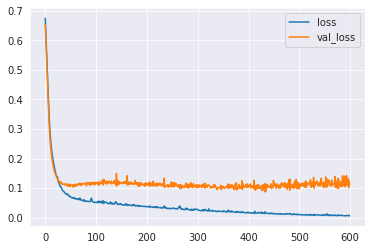

In [36]:
# Overfitting
# Both validation and training loss is decreasing but a certain point in time training loss is still going down
# but validation loss is increasing a sign of overfitting a data sets
# Use early stopping
losses.plot()

In [37]:
# Redefine the model
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
# Binary classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, t

In [42]:
# mode == max for accuracy and min for loss
# minimize loss
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)


In [44]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 5ms/sample - loss: 0.6743 - val_loss: 0.6549
Epoch 2/600
426/426 [==============================] - 0s 431us/sample - loss: 0.6386 - val_loss: 0.6222
Epoch 3/600
426/426 [==============================] - 0s 360us/sample - loss: 0.6005 - val_loss: 0.5812
Epoch 4/600
426/426 [==============================] - 0s 435us/sample - loss: 0.5547 - val_loss: 0.5363
Epoch 5/600
426/426 [==============================] - 0s 439us/sample - loss: 0.5082 - val_loss: 0.4856
Epoch 6/600
426/426 [==============================] - 0s 353us/sample - loss: 0.4582 - val_loss: 0.4321
Epoch 7/600
426/426 [==============================] - 0s 467us/sample - loss: 0.4081 - val_loss: 0.3804
Epoch 8/600
426/426 [==============================] - 0s 447us/sample - loss: 0.3619 - val_loss: 0.3350
Epoch 9/600
426/426 [==============================] - 0s 418us/sample - loss: 0.3210 - val_loss: 0.2997
Epoch 10/60

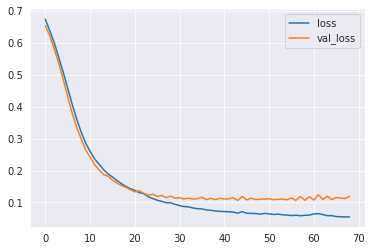

In [45]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [46]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

# Binary classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [47]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 6ms/sample - loss: 0.7178 - val_loss: 0.7045
Epoch 2/600
426/426 [==============================] - 0s 342us/sample - loss: 0.7075 - val_loss: 0.6891
Epoch 3/600
426/426 [==============================] - 0s 394us/sample - loss: 0.6794 - val_loss: 0.6722
Epoch 4/600
426/426 [==============================] - 0s 448us/sample - loss: 0.6627 - val_loss: 0.6533
Epoch 5/600
426/426 [==============================] - 0s 466us/sample - loss: 0.6517 - val_loss: 0.6362
Epoch 6/600
426/426 [==============================] - 0s 456us/sample - loss: 0.6281 - val_loss: 0.6179
Epoch 7/600
426/426 [==============================] - 0s 524us/sample - loss: 0.6174 - val_loss: 0.5977
Epoch 8/600
426/426 [==============================] - 0s 564us/sample - loss: 0.6003 - val_loss: 0.5774
Epoch 9/600
426/426 [==============================] - 0s 492us/sample - loss: 0.5841 - val_loss: 0.5562
Epoch 10/60

426/426 [==============================] - 0s 502us/sample - loss: 0.1295 - val_loss: 0.0991
Epoch 78/600
426/426 [==============================] - 0s 478us/sample - loss: 0.1348 - val_loss: 0.0942
Epoch 79/600
426/426 [==============================] - 0s 401us/sample - loss: 0.1241 - val_loss: 0.1033
Epoch 80/600
426/426 [==============================] - 0s 407us/sample - loss: 0.1324 - val_loss: 0.1088
Epoch 81/600
426/426 [==============================] - 0s 400us/sample - loss: 0.1365 - val_loss: 0.0974
Epoch 82/600
426/426 [==============================] - 0s 401us/sample - loss: 0.1180 - val_loss: 0.0950
Epoch 83/600
426/426 [==============================] - 0s 406us/sample - loss: 0.1007 - val_loss: 0.0997
Epoch 84/600
426/426 [==============================] - 0s 442us/sample - loss: 0.1084 - val_loss: 0.1049
Epoch 85/600
426/426 [==============================] - 0s 488us/sample - loss: 0.1145 - val_loss: 0.1006
Epoch 86/600
426/426 [==============================] - 0s 

Epoch 154/600
426/426 [==============================] - 0s 330us/sample - loss: 0.0784 - val_loss: 0.1187
Epoch 155/600
426/426 [==============================] - 0s 434us/sample - loss: 0.0860 - val_loss: 0.0957
Epoch 156/600
426/426 [==============================] - 0s 410us/sample - loss: 0.0881 - val_loss: 0.1116
Epoch 157/600
426/426 [==============================] - 0s 467us/sample - loss: 0.0976 - val_loss: 0.1093
Epoch 158/600
426/426 [==============================] - 0s 478us/sample - loss: 0.0696 - val_loss: 0.1012
Epoch 00158: early stopping


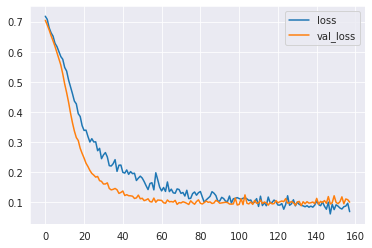

In [48]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [50]:
predictions = model.predict_classes(X_test)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [53]:
print(confusion_matrix(y_test,predictions))
# Misclassify 1 point

[[54  1]
 [ 2 86]]
